In [8]:
import eeg_pwr
import os
import numpy as np

In [9]:
direct='C:/Users/Phil/Box Sync/Classes/PSC_290_Final/data'
mont=os.path.join(direct, 'BP64_acti_64rows.sfp')

#event mappings for the test data
evMaps={'1': 1, '2': 2, '3': 3, '48': 48, '77': 77, '88':88, '100': 100, '200' : 200}

## Loading and Epoching Data
The boots class is the main class the users interact with and has the ability to load data from a designtated directory tree, epoch the data to user specified time windows for specified events and channels. If not all channels are required, specifiying the only the need content will make computation faster. The data is then stored as part of each subject class. Initiating the class needs atleast two arguments, the full path of the folder containing the data, and they type of eeg file it should look for. Event code are only necessary if you want to reference event codes by names rather than number. 

Analysis specicific boot strapping methods can be called as part of the class. By defualt this saves the resulting array as a class attribute. If the argument *output* is set to true, the array can be returned and stored in the global environent. 

__Average Run Time__ : 30s

In [10]:
%%capture

#initate class, load data
dats=eeg_pwr.boots(fileDir=direct, dataType='cnt', montage=mont, eventMap=None)
dats.load_data()

#epoch all channels  
dats.epoch_subjects(tmin=-.2, tmax=.8, baseline=(None,0.0), 
                    event=['1', '2', '3'], chans=None, store=True)

#get the mean amplitdue over event types for each channel
#and return an estimate of the data quality (SE)
dats.mean_amplitude(flatten_axes=1, boots=1000, return_stats=['std'])


## Data Accessability and Data Quality Reports

Examples of how to access data, and plot data quality maps. The two main aruments for these methods are *stat* and *across*, both of which can be string arguments specifying the statistic you want to extract and the name of the axis you want to apply it along.  

In [11]:
#access mean SE across electrodes for each subject
dats.get_error(across='electrode', type='mean')

array([2.54653098e-05, 2.76500616e-05, 7.45026627e-06, 6.36494291e-06,
       5.63050894e-06, 6.11386642e-06, 9.09423323e-06, 5.73582830e-06,
       4.64735775e-06, 4.13020504e-06, 6.36262491e-06, 7.23035375e-06,
       4.85877945e-06, 3.98766382e-06, 8.22893472e-06, 8.04971636e-06,
       1.11446724e-05, 6.44851436e-06, 5.22374466e-06, 5.44869351e-06,
       6.79990126e-06, 9.00898934e-06, 8.23892703e-06, 7.40079450e-06,
       6.49036057e-06, 7.13531814e-06, 7.99612752e-06, 9.03571596e-06,
       8.69729555e-06, 9.30915143e-06, 8.57868008e-06, 9.13331780e-06,
       2.23443019e-05, 1.31311292e-05, 1.20533702e-05, 1.84065044e-05,
       8.34892338e-06, 5.48616673e-06, 5.14787426e-06, 8.48125511e-06,
       8.51750001e-06, 7.54406165e-06, 4.82615995e-06, 5.80126618e-06,
       6.84691542e-06, 8.69990538e-06, 6.38249135e-06, 5.30447802e-06,
       5.15310233e-06, 6.87574982e-06, 7.35954700e-06, 5.39514492e-06,
       5.44175054e-06, 5.71851778e-06, 8.83495887e-06, 7.57364019e-06,
      

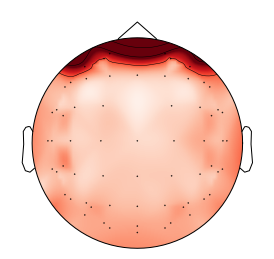

In [12]:
#visualize the mean data quality per electrode
dats.plot_quality_topo(across='subject', stat='mean')

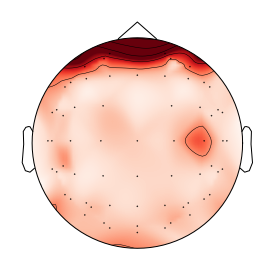

In [13]:
#visual the variablility in data quality per subject
dats.plot_quality_topo(across='subject', stat='std')

## Power Analysis
Example power analysis. These methods act directly on the class attribute of stored data from a bootstrapping method. Users can specify any combination of N hypotheical subjects and Effect sizes in the power analysis as a class attribute. The power table method plots these arrays for the deseried channels, all channels if left to None, or the average power across channels

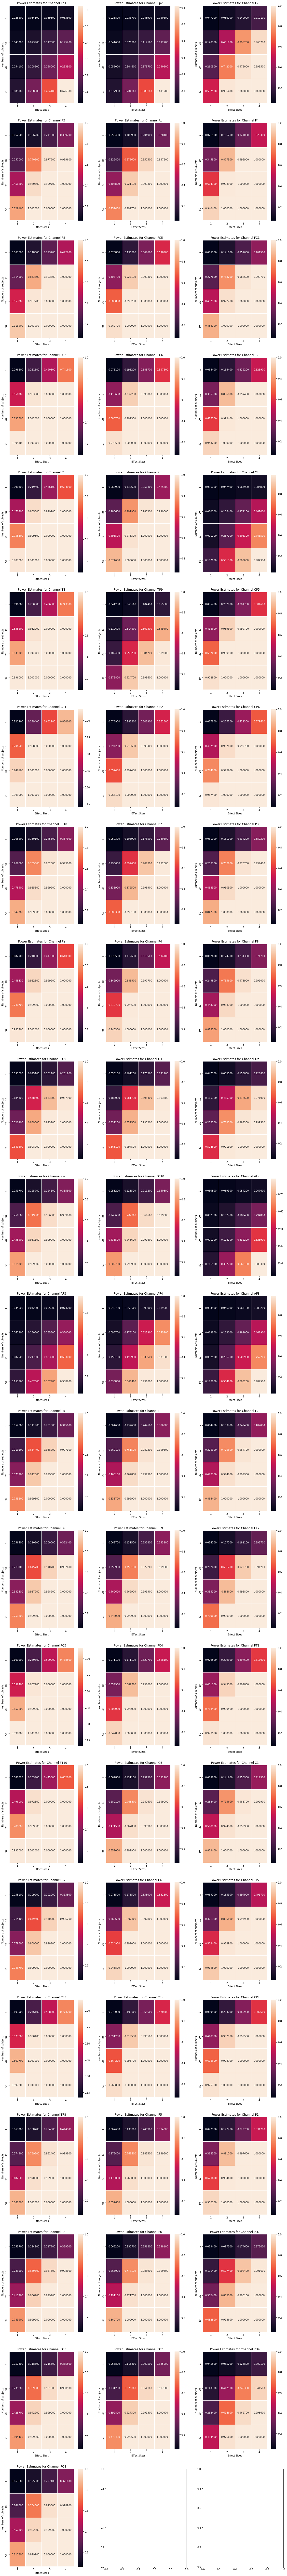

In [14]:
#do a power analysis across different levels of n Subjects and effect sizes
dats.power_analysis(nSubs=[1, 10, 20, 50], ES=np.arange(1, 5, 1))
dats.power_table(channels=None)